In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/diabetes[1].csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#  No missing values in data 

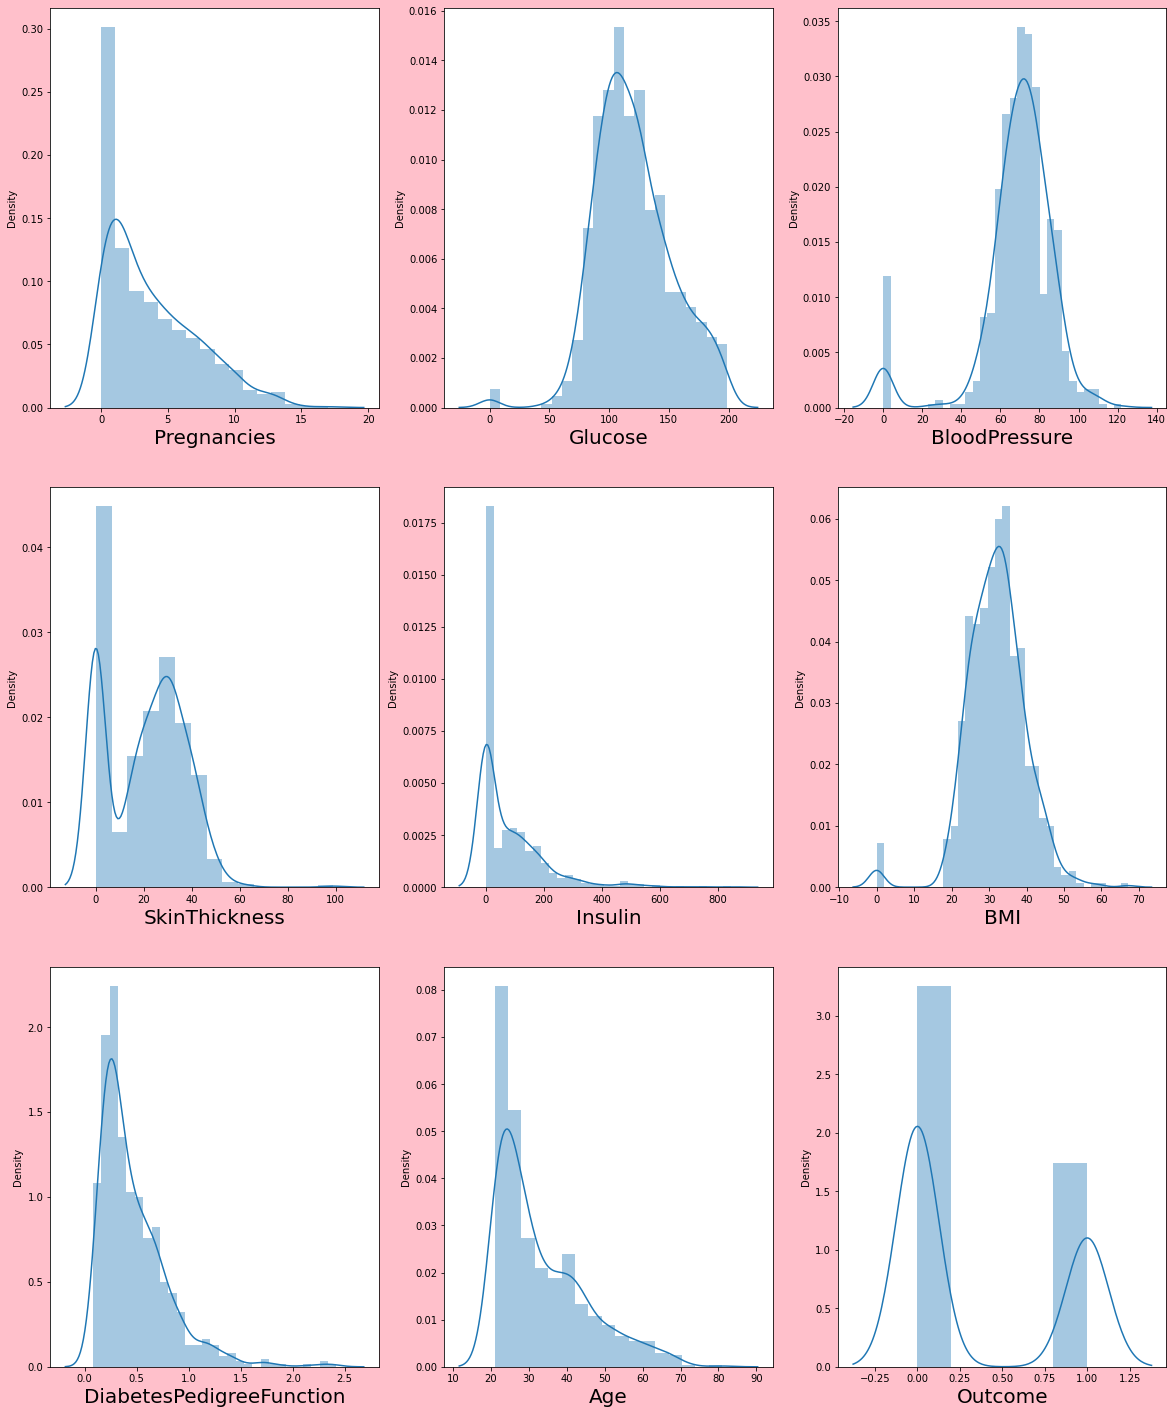

In [ ]:
# how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber = 1

for column in data :
  if plotnumber<=9:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()    

In [ ]:
# There is skewness in data.

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Replacing zero values 
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

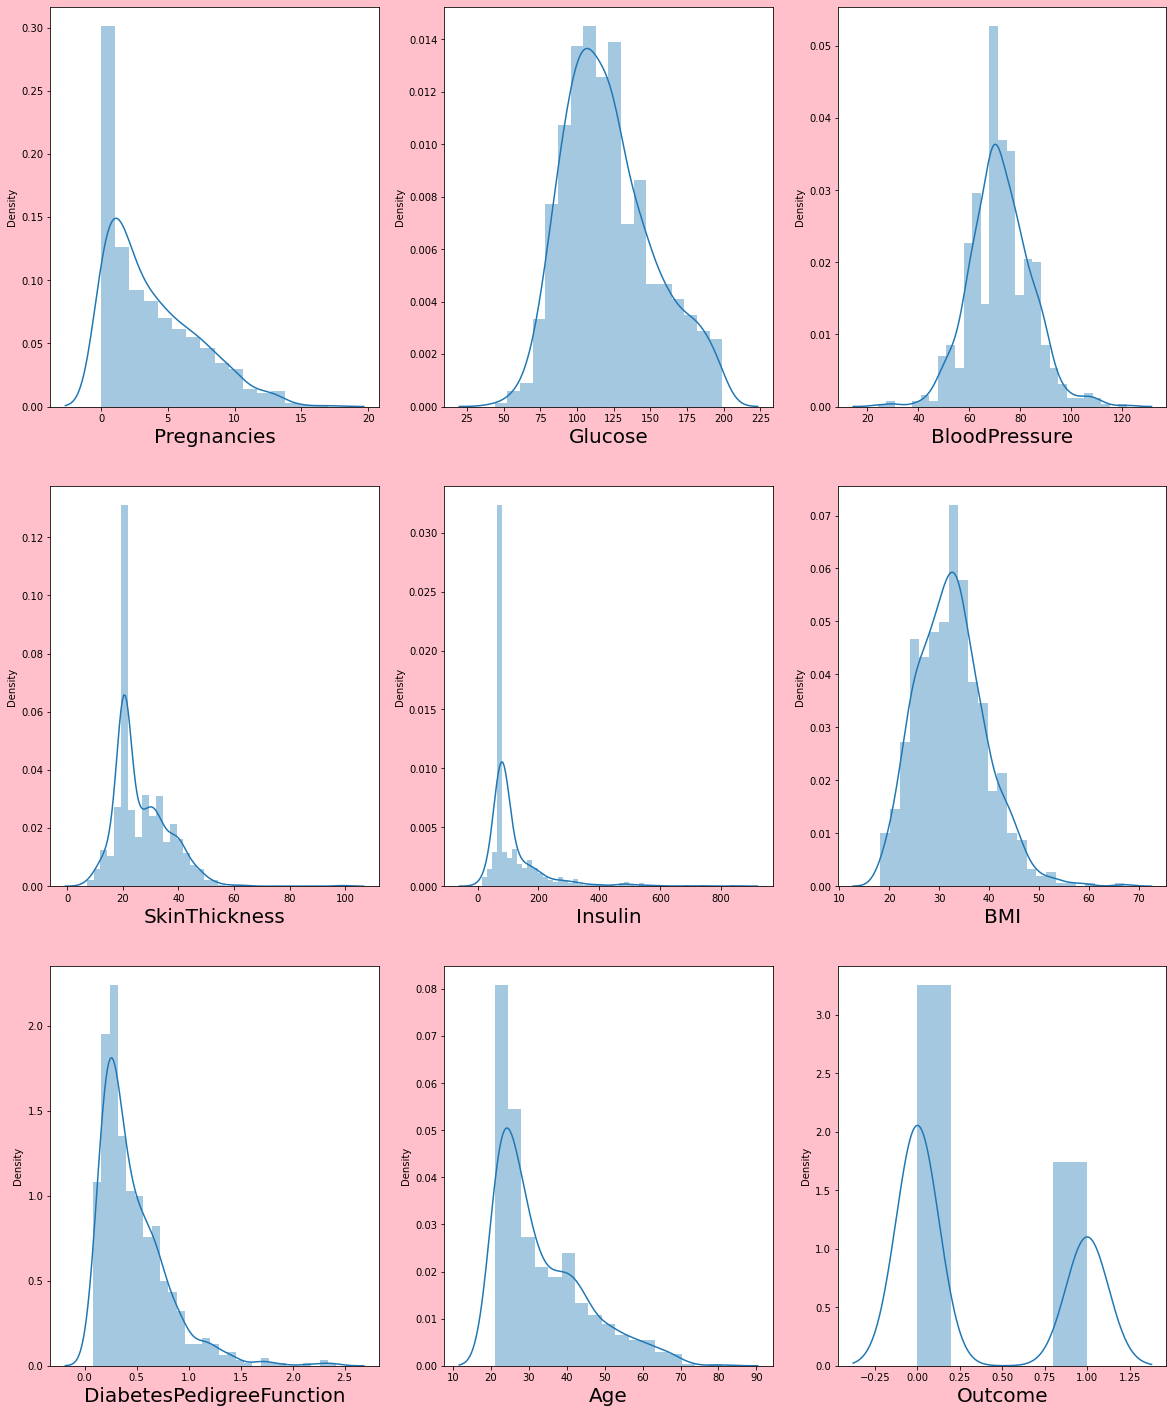

In [ ]:
# How data distribute after replacing zero
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1

for column in data:
  if plotnumber<=9:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()    

In [ ]:
# We have dealt with zero values but still outliers are present.

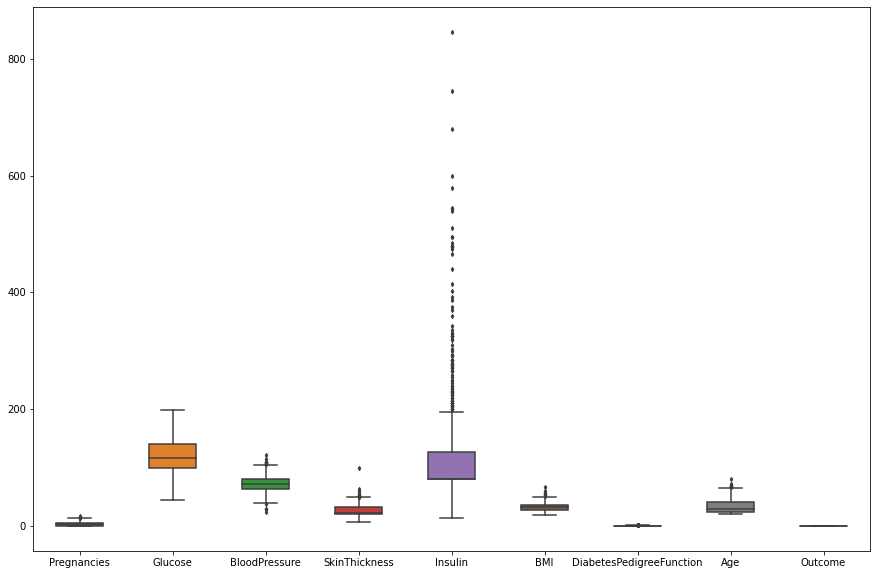

In [ ]:
# BOXPLOT
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [ ]:
# removing  2% data from Pregnancies 
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies']<q]


In [ ]:
# removing 1% data from  BMI 
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]


In [ ]:
# removing 1% data from  SkinThickness 
q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]


In [ ]:
# removing  5% data from  Insulin 
q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]


In [ ]:
# removing  1% data from  DiabetesPedigreeFunction 
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]


In [ ]:
# removing 1% data from  Age 
q = data_cleaned['Age'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Age']<q]


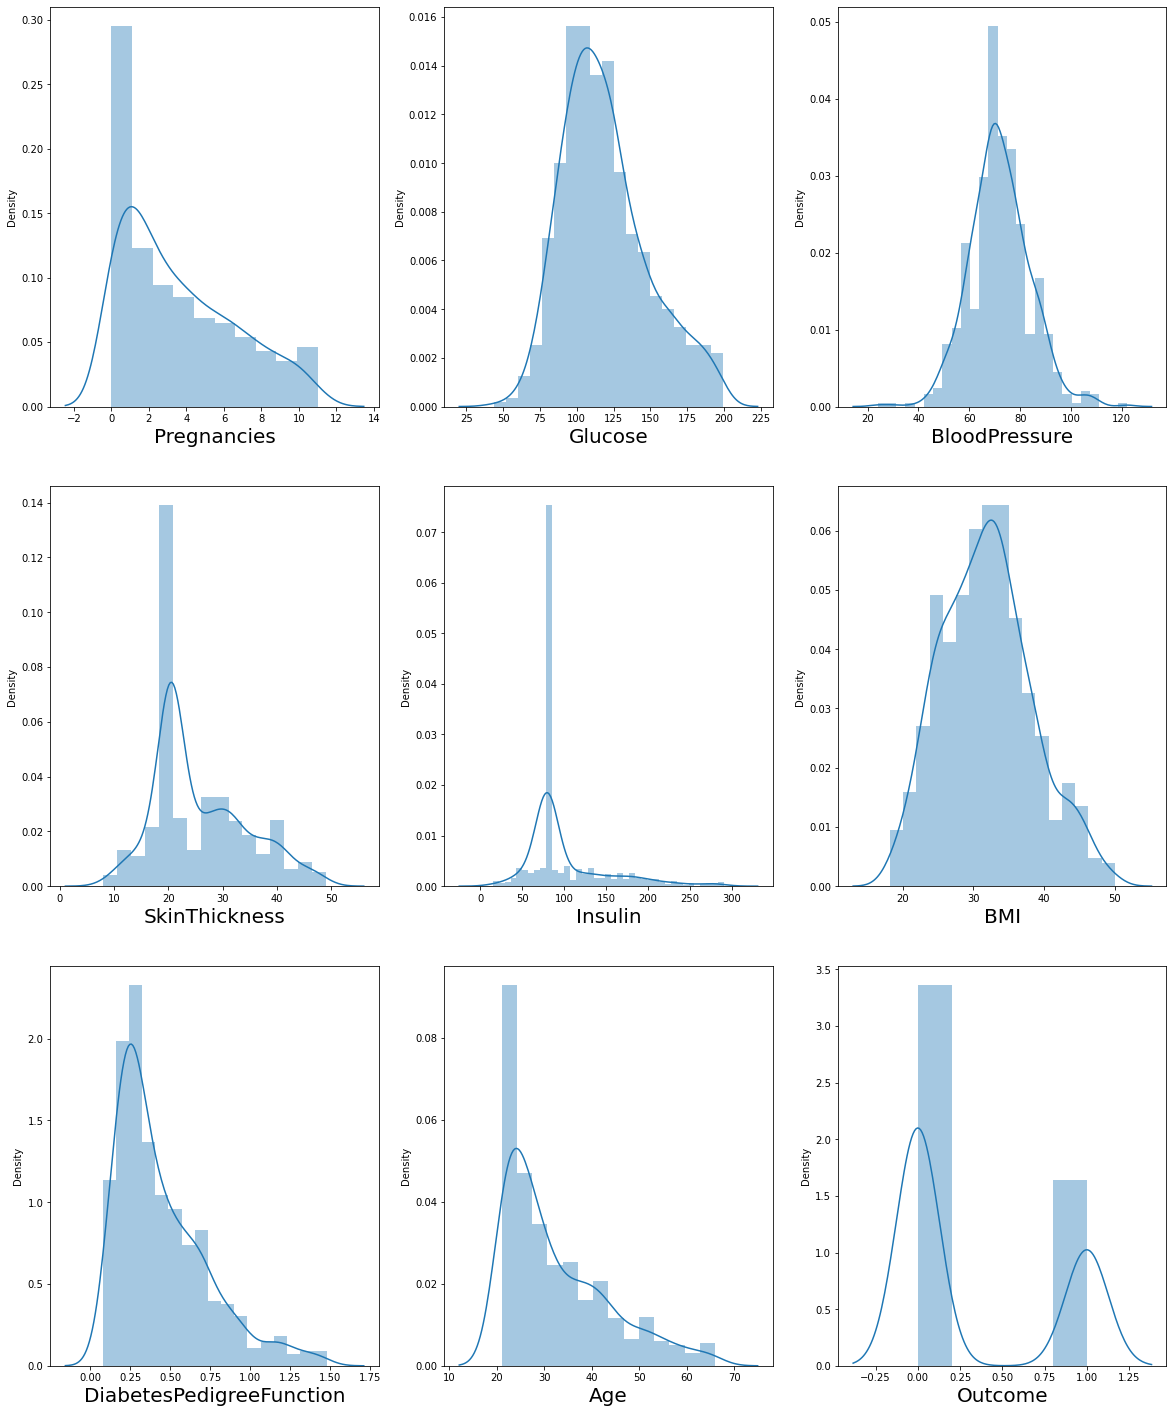

In [ ]:
# How data distribute 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

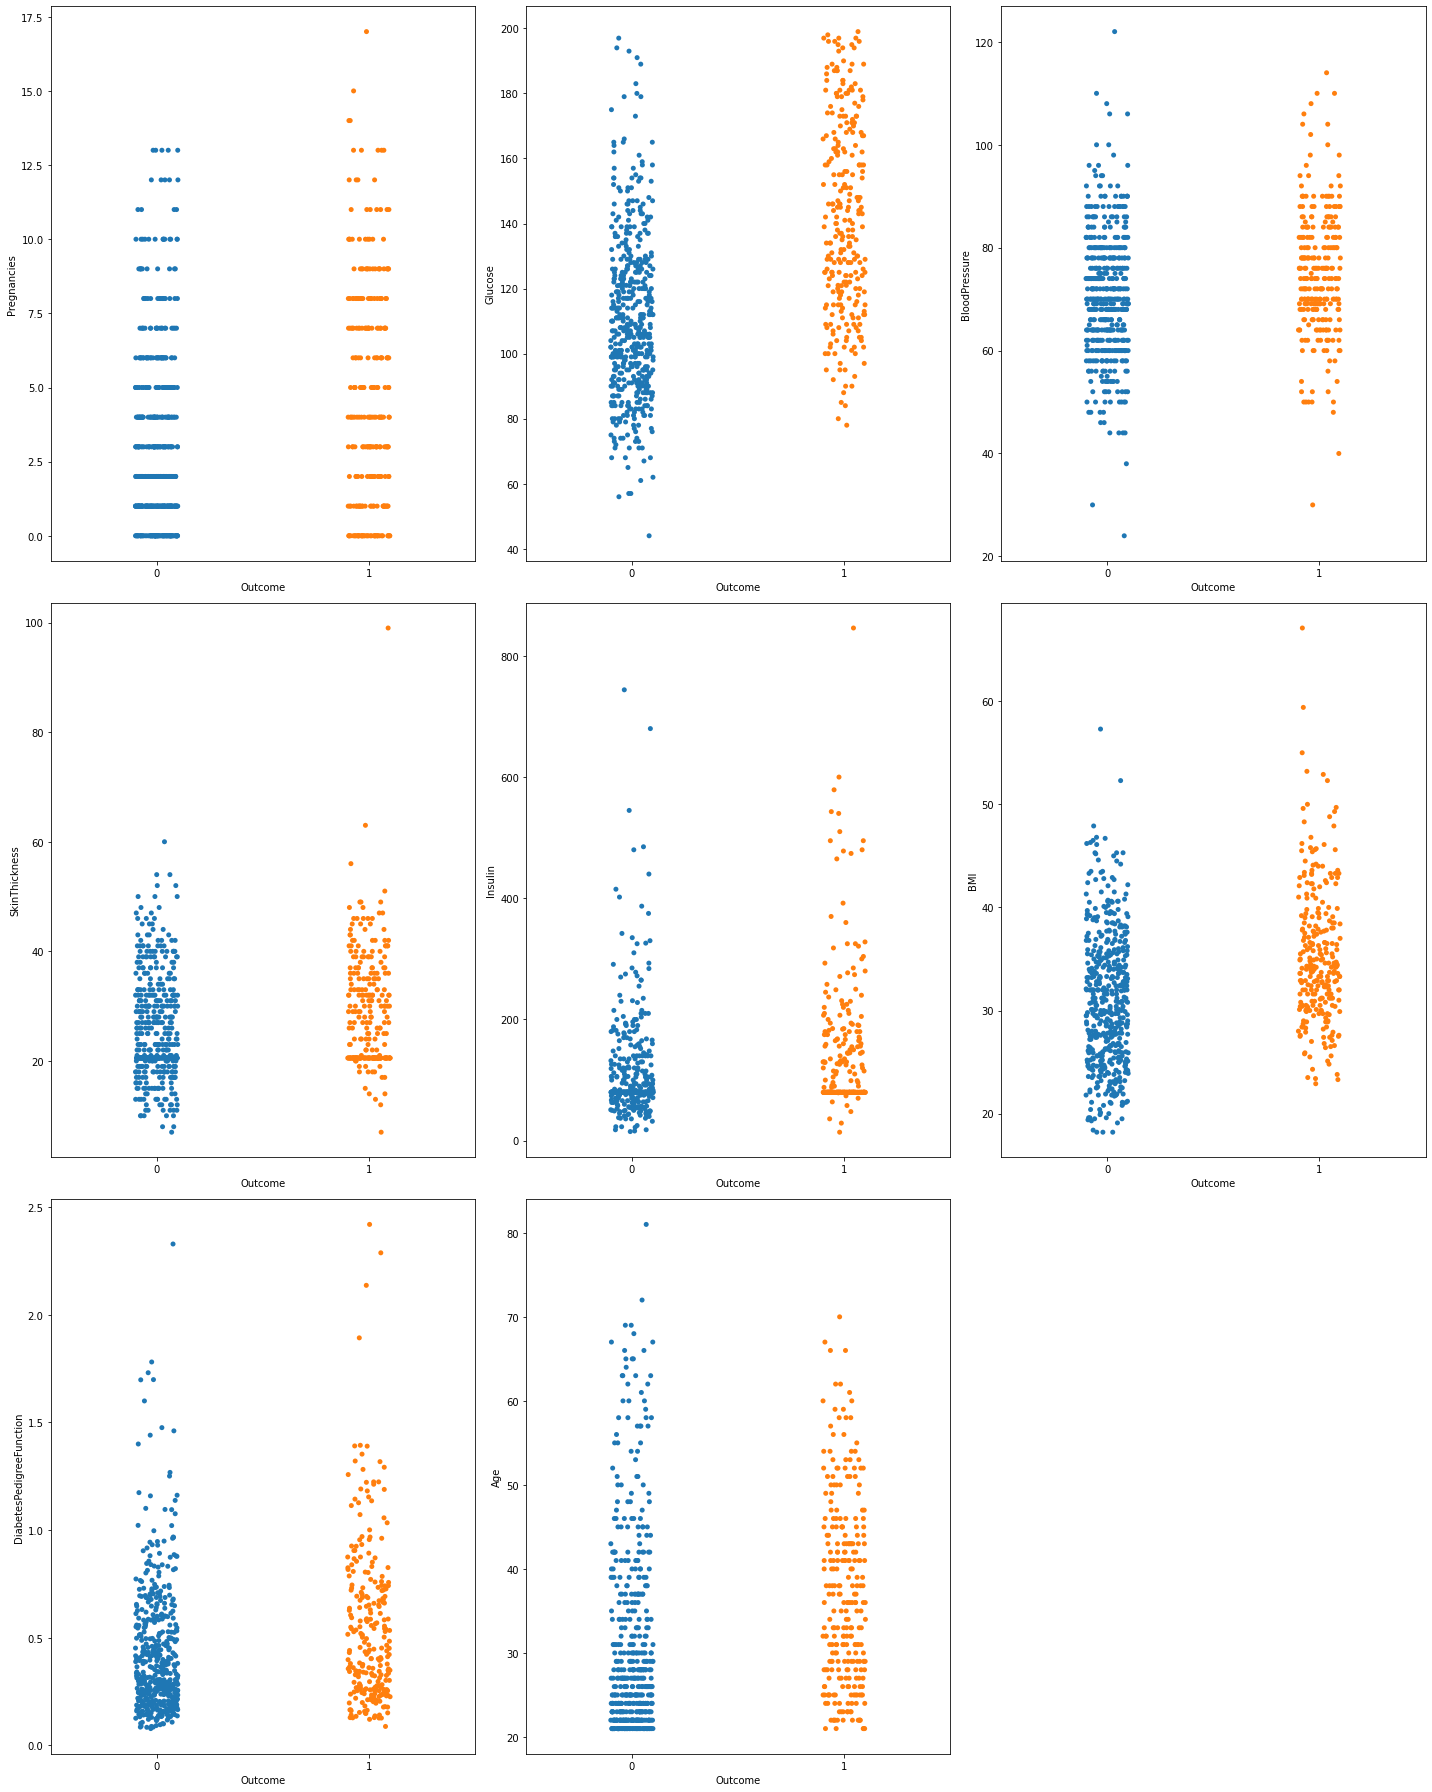

In [ ]:
# Visualization
# Data distribution
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
# checking multicollinearity in the dependent variables
# se the standard scaler 

scalar =  StandardScaler()
X_scaled = scalar.fit_transform(X)

In [ ]:
# Data after scaling
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [ ]:
# VIF (variance inflation factor) :

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns


In [ ]:
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [ ]:
# No multicollinearity because vif values are less than 5 

In [ ]:
# Splitting
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)


In [ ]:
# Logistic model for training
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(x_test)
log_score = round(log.score(x_train,y_train)* 100,2)
print ('Logistic training Score ==>', log_score)

Logistic training Score ==> 78.82


In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]])

In [ ]:
print (classification_report(y_test,y_pred,digits=2))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.70      0.52      0.60        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



In [ ]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_pred = knn.predict(x_test)
knn_score = round(knn.score(x_train,y_train)* 100,2)
print ('Knn training Score ==>', knn_score)

Knn training Score ==> 85.94


In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_score = round(svc.score(x_train, y_train) * 100, 2)
print ('SVC training Score ==>',svc_score)

SVC training Score ==> 83.33


In [ ]:
# Sthocastic Gradiant Descent Classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
sgd_score = round(sgd.score(x_train, y_train) * 100, 2)
print ('SGDC training Score ==>',sgd_score)

SGDC training Score ==> 67.19


In [ ]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_test)
dt_score = round(decision_tree.score(x_train, y_train) * 100, 2)
print ('Dic Tree training Score ==>',dt_score)

Dic Tree training Score ==> 100.0


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=50,criterion='entropy')
random_forest.fit(x_train, y_train)
rm_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
rm_score = round(random_forest.score(x_train, y_train) * 100, 2)
print ('Random Forest training Score ==>',rm_score)

Random Forest training Score ==> 100.0


In [ ]:
models = pd.DataFrame({'Classifier':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Stochastic Gradient Decent', 'Decision Tree'],
                      'Score':[svc_score,knn_score,log_score,rm_score,sgd_score,dt_score]})
models.sort_values(by='Score',ascending=False)

,Classifier,Score
3,Random Forest,100.00
5,Decision Tree,100.00
1,KNN,85.94
0,Support Vector Machines,83.33
2,Logistic Regression,78.82
4,Stochastic Gradient Decent,67.19


In [39]:
#Saving the model
import joblib 
joblib.dump(random_forest,"Diabetis_Data_Analysis.pkl")

['Diabetis_Data_Analysis.pkl']